In [ ]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
class NaiveBayesClassifier:

    def __init__(self):
        pass

    # Separate the dataset into a subset of data for each class

    def separate_classes(self, X, y):
        """
        Separates the dataset in to a subset of data for each class.
        Parameters:
        ------------
        X- array, list of features
        y- list, target
        Returns:
        A dictionary with y as keys and assigned X as values.
        """
        separated_classes = {}
        for i in range(len(X)):
            feature_values = X[i]
            class_name = y[i]
            if class_name not in separated_classes:
                separated_classes[class_name] = []
            separated_classes[class_name].append(feature_values)
        return separated_classes

    # Standard deviation and mean are required for the (Gaussian) distribution function

    def stat_info(self, X):
        """
        Calculates standard deviation and mean of features.
        Parameters:
        ------------
        X- array , list of features
        Returns:
        A dictionary with STD and Mean as keys and assigned features STD and Mean as values.
        """
        for feature in zip(*X):
            yield {
                'std' : np.std(feature),
                'mean' : np.mean(feature)
            }
            
    # Required fit method, to train the model
    def fit (self, X, y):
        separated_classes = self.separate_classes(X, y)
        self.class_summary = {}

        for class_name, feature_values in separated_classes.items():
            self.class_summary[class_name] = {
                'prior_proba': len(feature_values)/len(X),
                'summary': [i for i in self.stat_info(feature_values)],
            }
        return self.class_summary

    # Gaussian distribution function
    def distribution(self, x, mean, std):
        exponent = np.exp(-((x-mean)**2 / (2*std**2)))
        return exponent / (np.sqrt(2*np.pi)*std)

    # Required predict method, to predict the class
    def predict(self, X):
        MAPs = []

        for row in X:
            joint_proba = {}
            
            for class_name, features in self.class_summary.items():
                total_features =  len(features['summary'])
                likelihood = 1

                for idx in range(total_features):
                    feature = row[idx]
                    mean = features['summary'][idx]['mean']
                    stdev = features['summary'][idx]['std']
                    normal_proba = self.distribution(feature, mean, stdev)
                    likelihood *= normal_proba
                prior_proba = features['prior_proba']
                joint_proba[class_name] = prior_proba * likelihood

            MAP = max(joint_proba, key= joint_proba.get)
            MAPs.append(MAP)

        return MAPs
    
    # Calculate the model's accuracy

    def accuracy(self, y_test, y_pred):
        """
        Calculates model's accuracy.
        Parameters:
        ------------
        y_test: actual values
        y_pred: predicted values
        Returns:
        ------------
        A number between 0-1, representing the percentage of correct predictions.
        """

        true_true = 0

        for y_t, y_p in zip(y_test, y_pred):
            if y_t == y_p:
                true_true += 1 
        return true_true / len(y_test)
        

In [ ]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
    



In [ ]:

df = load_csv('/content/pima-indians-diabetes.txt')

for i in range(len(df)):
  for j in range(8):
    df[i][j] = float(df[i][j])

X = np.array([df[0][0:8]])
y = np.array([df[0][8]])

for i in range(1, len(df)):
  tmp = np.array([])
  for j in range(len(df[0])):
    if (j == 8):
      y = np.append(y, df[i][j])
      continue
    tmp = np.append(tmp, df[i][j])
  X = np.vstack([X, tmp])

import pandas as pd

data = {'Number of pregnancies':pd.Series(X[:,0]),
     'Plasma glucose concentration':pd.Series(X[:,1]),
     'Diastolic blood pressure':pd.Series(X[:,2]),
     'Triceps skinfold thickness':pd.Series(X[:,3]),
     'Serum insulin':pd.Series(X[:,4]),
     'Body mass index':pd.Series(X[:,5]),
     'Diabetes pedigree':pd.Series(X[:,6]),
     'Age':pd.Series(X[:,7]),
     'Class variable': pd.Series(y)}

df = pd.DataFrame(data)

df.head()




,Number of pregnancies,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
df.describe()


,Number of pregnancies,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Diabetes pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


(array([268.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

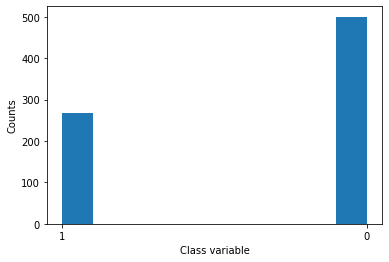

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Class variable')
ax.set_ylabel('Counts')
ax.hist(y)

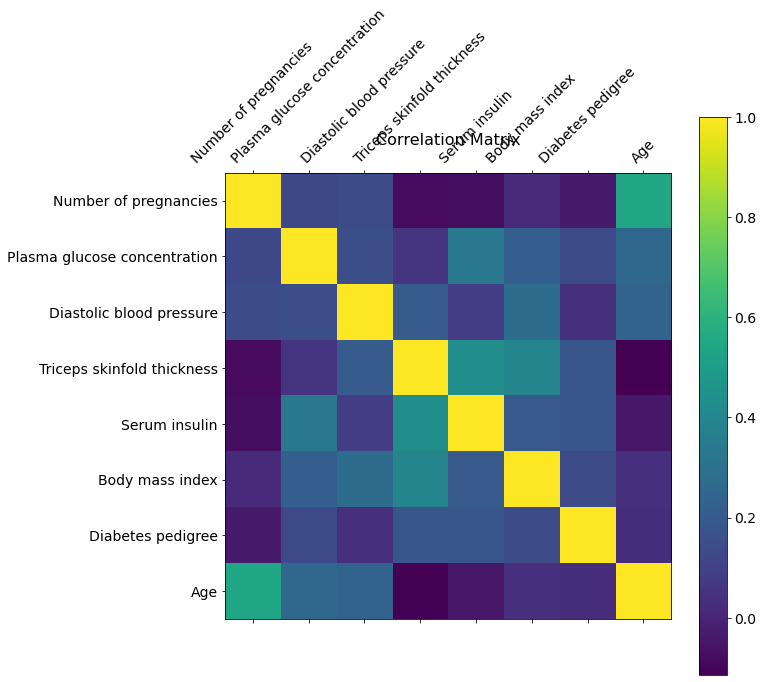

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), 
           df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), 
           df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Scikit-learn GaussianNB accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))

Scikit-learn GaussianNB accuracy: 0.755


In [ ]:
model = NaiveBayesClassifier()
model.fit(X_train, y_train)
y_pred_own = model.predict(X_test)

print("NaiveBayesClassifier accuracy: {0:.3f}".format(model.accuracy(y_test, y_pred_own)))

NaiveBayesClassifier accuracy: 0.755


In [ ]:
from sklearn. metrics import roc_auc_score, roc_curve

r_auc = roc_auc_score(y_test, y_pred)
r_auc_own = roc_auc_score(y_test, y_pred_own)
print(r_auc)

0.7269119769119768


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


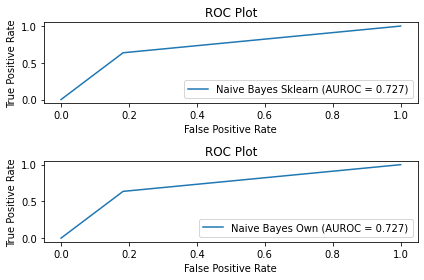

In [ ]:
y_pred_conv = []
y_test_conv = []
y_pred_conv_own = []
for i in range(len(y_test)):
  y_test_conv.append(int(y_test[i]))
  y_pred_conv.append(y_pred[i].astype(np.int64))
  y_pred_conv_own.append(y_pred_own[i].astype(np.int64))


fpr, tpr, _ = roc_curve(y_test_conv, y_pred_conv)
fpr_own, tpr_own, _ = roc_curve(y_test_conv, y_pred_conv_own)

fig, axs = plt.subplots(2)
axs[0].plot(fpr, tpr, label='Naive Bayes Sklearn (AUROC = %0.3f)' % r_auc)
axs[1].plot(fpr_own, tpr_own, label='Naive Bayes Own (AUROC = %0.3f)' % r_auc_own)

axs[0].set_title("ROC Plot")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")

axs[1].set_title("ROC Plot")
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")

fig.tight_layout()
    
axs[0].legend()
axs[1].legend()
plt.show() 